In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np

In [57]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/COPD.csv')

In [58]:
df.head()

,CensusTract,COPD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,7.6,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,7.2,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,9.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,7.8,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,9.8,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [59]:
df.set_index('CensusTract', inplace=True)
df.head()


,COPD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,7.6,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,7.2,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,9.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,7.8,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,9.8,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


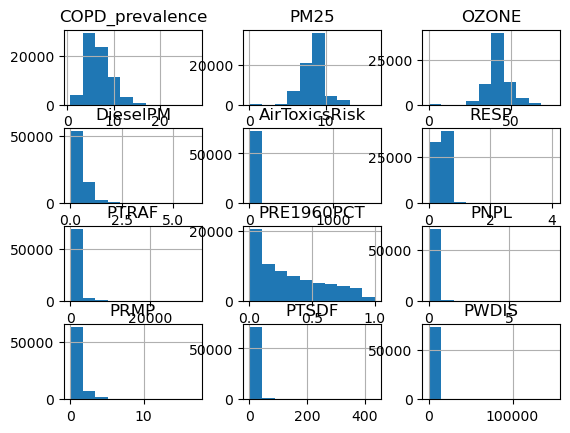

In [60]:
df.hist()
plt.show()

In [61]:
X = df.copy()
X.drop('COPD_prevalence', axis=1, inplace=True)
y = df['COPD_prevalence']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54242, 11) (54242,)
(18081, 11) (18081,)


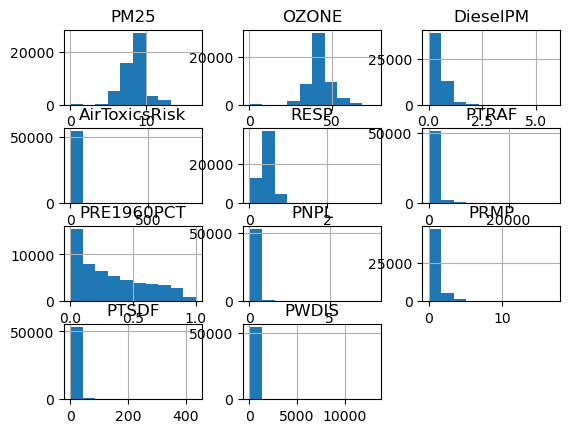

In [64]:
X_train.hist()
plt.show()

In [65]:
X_train.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
34001013500,7.269659,43.083685,0.380619,21.897351,0.275290,395.353277,0.401774,0.108830,0.023628,0.365574,0.000000
6111008202,9.235945,55.810825,0.201200,30.999085,0.436840,3029.839140,0.033567,0.046115,0.146580,5.249336,0.000000
42101021000,9.541344,44.536636,0.775203,36.090181,0.479955,1426.718239,0.742185,0.099490,0.628531,0.981279,2043.017939
51510201000,8.773917,43.929469,1.003340,37.677443,0.560314,3812.242127,0.858842,0.110155,0.187352,8.109168,0.001985
36081003400,8.164496,40.901482,1.487123,38.294137,0.619504,1394.789667,0.869095,0.277041,1.483957,56.744352,0.000000


In [66]:
# Taking the log of the data in X_train that are not close to being normally distributed
pt = PowerTransformer()
pt.fit(X_train[['DieselPM']])
X_train['DieselPM'] = pt.transform(X_train[['DieselPM']])

pt1 = PowerTransformer()
pt1.fit(X_train[['AirToxicsRisk']])
X_train['AirToxicsRisk'] = pt1.transform(X_train[['AirToxicsRisk']])

pt2 = PowerTransformer()
pt2.fit(X_train[['RESP']])
X_train['RESP'] = pt2.transform(X_train[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train[['PTRAF']])
X_train['PTRAF'] = pt3.transform(X_train[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train[['PRE1960PCT']])
X_train['PRE1960PCT'] = pt4.transform(X_train[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train[['PNPL']])
X_train['PNPL'] = pt5.transform(X_train[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train[['PRMP']])
X_train['PRMP'] = pt6.transform(X_train[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train[['PTSDF']])
X_train['PTSDF'] = pt7.transform(X_train[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train[['PWDIS']])
X_train['PWDIS'] = pt8.transform(X_train[['PWDIS']])

pt9 = PowerTransformer()
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)
pt9.fit(y_train)
y_train = pt9.transform(y_train)
y_train = np.ravel(y_train)

In [67]:
print(X_train.shape, y_train.shape)

(54242, 11) (54242,)


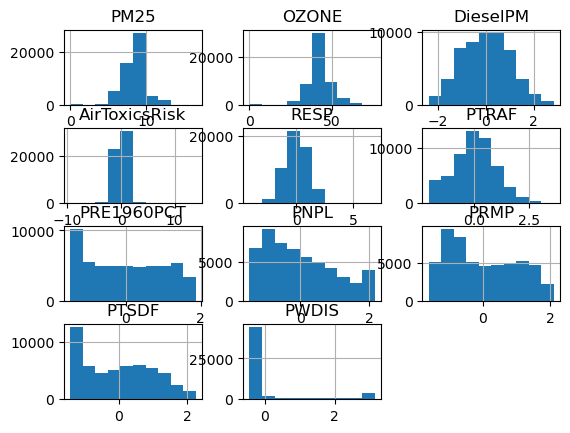

In [68]:
X_train.hist()
plt.show()

PWDIS should just be left out of the data since it is not normally distributed

In [69]:
X_train.drop('PWDIS', axis=1, inplace=True)
X_test.drop('PWDIS', axis=1, inplace=True)

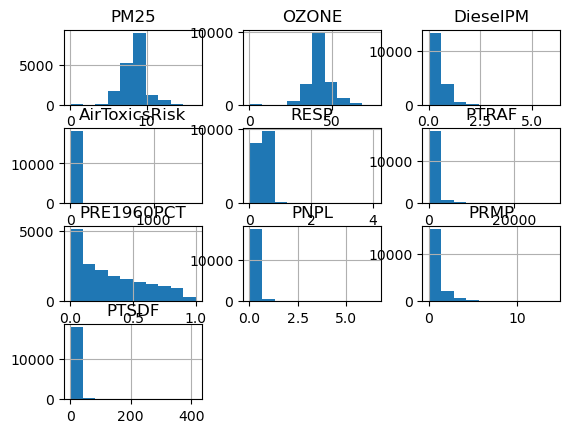

In [70]:
X_test.hist()
plt.show()

In [71]:
# Transforming the test data using the PowerTransformer that I fit on the train data
X_test['DieselPM'] = pt.transform(X_test[['DieselPM']])

X_test['AirToxicsRisk'] = pt1.transform(X_test[['AirToxicsRisk']])

X_test['RESP'] = pt2.transform(X_test[['RESP']]) 

X_test['PTRAF'] = pt3.transform(X_test[['PTRAF']])

X_test['PRE1960PCT'] = pt4.transform(X_test[['PRE1960PCT']])

X_test['PNPL'] = pt5.transform(X_test[['PNPL']])

X_test['PRMP'] = pt6.transform(X_test[['PRMP']])

X_test['PTSDF'] = pt7.transform(X_test[['PTSDF']])



y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = pt9.transform(y_test)
y_test = y_test.reshape(18081,)
y_test.shape

(18081,)

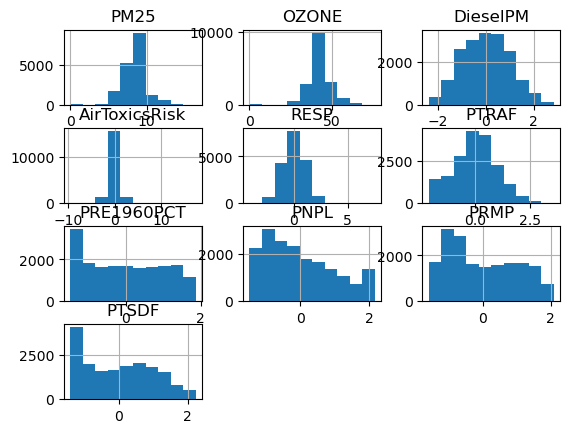

In [72]:
X_test.hist()
plt.show()

COPD data should now be ready to model

In [73]:
print(y_train.shape, X_train.shape)

(54242,) (54242, 10)


In [74]:
X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_COPD')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_COPD')

y_test = pd.Series(y_test)
y_train = pd.Series(y_train)
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_COPD')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_COPD')

In [75]:
y_test.shape

(18081,)

In [76]:
y_train.shape

(54242,)